## Imports

In [45]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

## Inital simulations configs

In [2]:
# Mapping Ladders and Snakes
ladder_heads = {'3': '16', '5': '7', '15': '25', '18': '20', '21': '32'}
snake_heads = {'12': '2', '14': '11', '17': '4', '31': '19', '35': '22'}

# Define number of simulations
num_games = 10000

## Case 1

In [4]:
def play_game():
    player1_position = 1
    player2_position = 1
    
    turns = 0
    count_ladders_p1 = 0
    count_ladders_p2 = 0
    count_snakes_p1 = 0
    count_snakes_p2 = 0
    
    while player1_position < 36 and player2_position < 36:
        # Player 1's turn
        roll = random.randint(1, 6)
        player1_position += roll
        if str(player1_position) in ladder_heads:
            count_ladders_p1+=1
            player1_position = int(ladder_heads[str(player1_position)])
            
        elif str(player1_position) in snake_heads:
            count_snakes_p1+=1
            player1_position = int(snake_heads[str(player1_position)])        

        if player1_position < 36:
            # Player 2's turn
            roll = random.randint(1, 6)
            player2_position += roll
            if str(player2_position) in ladder_heads:
                count_ladders_p2+=1
                player2_position = int(ladder_heads[str(player2_position)])
                
            elif str(player2_position) in snake_heads:
                count_snakes_p2+=1
                player2_position = int(snake_heads[str(player2_position)])
        
        turns+=1
        
    info_dict = {
        'turns':turns,
        'ladders_p1': count_ladders_p1,
        'ladders_p2': count_ladders_p2,
        'snakes_p1': count_snakes_p1,
        'snakes_p2': count_snakes_p2,
        'final_p1': player1_position,
        'final_p2': player2_position
    }
    return info_dict

### Game Implementation - Case 1

### Simulation - Case 1

In [5]:
case1 = []
for _ in range(num_games):
    case1.append(play_game())
    
case1_stats = pd.DataFrame(case1)
case1_stats['round'] = np.arange(1,10001)
case1_stats['win_p1'] = case1_stats['final_p1'] >= 36

case1_stats['final_ladders'] = case1_stats['ladders_p1'] + case1_stats['ladders_p2']
case1_stats['final_snakes'] = case1_stats['snakes_p1'] + case1_stats['snakes_p2']

case1_stats = case1_stats[['round','turns', 'ladders_p1', 'ladders_p2', 'snakes_p1', 
                           'snakes_p2','final_ladders','final_snakes','final_p1', 'final_p2','win_p1']]



### General Statistics for simulations

#### Which player has the higher probability of winning based on the result?

In [6]:
probability_player1_wins = sum(case1_stats['win_p1']) / num_games
print(f"Probability that player 1 wins: {probability_player1_wins:.2%}")
print(f"Probability that player 2 wins: {1 - probability_player1_wins:.2%}")

Probability that player 1 wins: 52.88%
Probability that player 2 wins: 47.12%


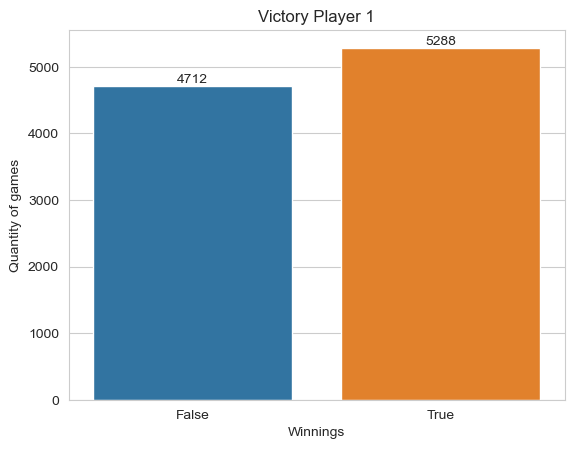

In [16]:
victory_p1 = case1_stats.groupby(['win_p1'],as_index = False)['round'].count()

fig = sns.barplot(y = victory_p1['round'], x = victory_p1['win_p1'])
fig.set(xlabel ="Winnings", ylabel = "Quantity of games", title ='Victory Player 1')
plt.subplots_adjust(hspace = 0.8)

for i in fig.containers:
    fig.bar_label(i,)

#### Statistical Analysis

In [17]:
# Average Rounds
count = case1_stats.groupby(['turns'],as_index=False)['round'].count().rename(columns = {
    'round':'games'
})
case1_stats['turns'].describe()

count    10000.000000
mean         9.833700
std          4.082611
min          3.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         37.000000
Name: turns, dtype: float64

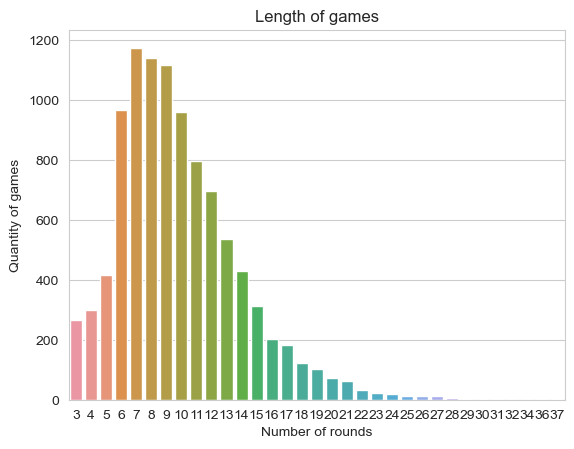

In [18]:
fig = sns.barplot(y = count['games'], x = count['turns'])
fig.set(xlabel ="Number of rounds", ylabel = "Quantity of games", title ='Length of games')
plt.subplots_adjust(hspace = 1.2)

#### Average Snakes and Ladders per player

In [21]:
case1_stats['ladders_p1'].describe()

count    10000.000000
mean         1.273400
std          0.826874
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: ladders_p1, dtype: float64

In [22]:
case1_stats['ladders_p2'].describe()

count    10000.00000
mean         1.22700
std          0.82906
min          0.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          5.00000
Name: ladders_p2, dtype: float64

In [23]:
case1_stats['snakes_p1'].describe()

count    10000.000000
mean         1.595200
std          1.491898
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         12.000000
Name: snakes_p1, dtype: float64

In [24]:
case1_stats['snakes_p2'].describe()

count    10000.000000
mean         1.506100
std          1.454158
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: snakes_p2, dtype: float64

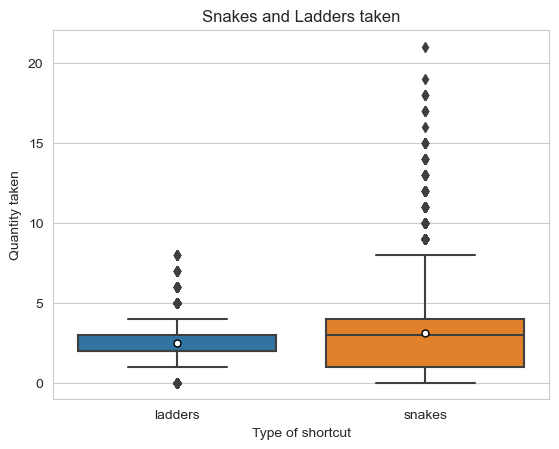

In [25]:
# Game average ladders and snakes
ladders = case1_stats[['round','final_ladders']].rename(columns = {
    'final_ladders':'count'
})
ladders['type'] = 'ladders'

snakes = case1_stats[['round','final_snakes']].rename(columns = {
    'final_snakes':'count'
})
snakes['type'] = 'snakes'

ladders_snakes = pd.concat([ladders,snakes])

fig = sns.boxplot(data=ladders_snakes, x = 'type', y ='count',
                 showmeans=True,
                meanprops={'marker':'o',
                           'markerfacecolor':'white', 
                           'markeredgecolor':'black',
                           'markersize':'5'})
fig.set(xlabel ="Type of shortcut", ylabel = "Quantity taken", title ='Snakes and Ladders taken')

plt.subplots_adjust(hspace = 1.2)

In [26]:
case1_stats['final_snakes'].describe()

count    10000.000000
mean         3.101300
std          2.549684
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         21.000000
Name: final_snakes, dtype: float64

In [27]:
case1_stats['final_ladders'].describe()

count    10000.000000
mean         2.500400
std          1.123444
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: final_ladders, dtype: float64

#### Who takes more ladders always win?

In [28]:
stats_ladders = case1_stats[['ladders_p1', 'ladders_p2', 'win_p1']]
stats_ladders['more_ladders_p1'] = stats_ladders['ladders_p1'] > stats_ladders['ladders_p2']
stats_ladders.groupby(['win_p1','more_ladders_p1'],as_index = False)['ladders_p1'].count()

C:\Users\vinic\AppData\Local\Temp\ipykernel_13468\2841488366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_ladders['more_ladders_p1'] = stats_ladders['ladders_p1'] > stats_ladders['ladders_p2']


,win_p1,more_ladders_p1,ladders_p1
0,False,False,3690
1,False,True,1022
2,True,False,2787
3,True,True,2501


In [76]:
(2501 + 3690)/num_games

0.6191

#### Who takes more snakes always lose?

In [30]:
stats_ladders = case1_stats[['snakes_p1', 'snakes_p2', 'win_p1']]
stats_ladders['more_snakes_p1'] = stats_ladders['snakes_p1'] > stats_ladders['snakes_p2']
stats_ladders.groupby(['win_p1','more_snakes_p1'],as_index = False)['snakes_p1'].count()

C:\Users\vinic\AppData\Local\Temp\ipykernel_13468\4233043137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_ladders['more_snakes_p1'] = stats_ladders['snakes_p1'] > stats_ladders['snakes_p2']


,win_p1,more_snakes_p1,snakes_p1
0,False,False,1598
1,False,True,3114
2,True,False,4636
3,True,True,652


In [77]:
(4636 + 3114)/num_games

0.775

In [32]:
## Diff between final position
case1_stats['diff_final_position'] = abs(case1_stats['final_p1'] - case1_stats['final_p2'])
case1_stats['diff_final_position'].describe()

count    10000.000000
mean        16.843500
std          9.531825
min          2.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         38.000000
Name: diff_final_position, dtype: float64

##  Case 2

### Game Implementation - Case 2

In [33]:
## Insert a little randomness on our code for the ladders
def play_game():
    player1_position = 1
    player2_position = 1
    
    turns = 0
    count_ladders_p1 = 0
    count_ladders_p2 = 0
    count_snakes_p1 = 0
    count_snakes_p2 = 0
    
    while player1_position < 36 and player2_position < 36:
        # Player 1's turn
        roll = random.randint(1, 6)
        player1_position += roll
        if str(player1_position) in ladder_heads:
            if random.random() > 0.5:
                count_ladders_p1+=1
                player1_position = int(ladder_heads[str(player1_position)])
            
        elif str(player1_position) in snake_heads:
            count_snakes_p1+=1
            player1_position = int(snake_heads[str(player1_position)])        

        if player1_position < 36:
            # Player 2's turn
            roll = random.randint(1, 6)
            player2_position += roll
            if str(player2_position) in ladder_heads:
                if random.random() > 0.5:
                    count_ladders_p2+=1
                    player2_position = int(ladder_heads[str(player2_position)])
                
            elif str(player2_position) in snake_heads:
                count_snakes_p2+=1
                player2_position = int(snake_heads[str(player2_position)])
        
        turns+=1
        
    info_dict = {
        'turns':turns,
        'ladders_p1': count_ladders_p1,
        'ladders_p2': count_ladders_p2,
        'snakes_p1': count_snakes_p1,
        'snakes_p2': count_snakes_p2,
        'final_p1': player1_position,
        'final_p2': player2_position
    }
    return info_dict

### Simulation - Case 2

In [34]:
case2 = []
for _ in range(num_games):
    case2.append(play_game())
    
case2_stats = pd.DataFrame(case2)
case2_stats['round'] = np.arange(1,10001)
case2_stats['win_p1'] = case2_stats['final_p1'] >= 36

case2_stats['final_ladders'] = case2_stats['ladders_p1'] + case2_stats['ladders_p2']
case2_stats['final_snakes'] = case2_stats['snakes_p1'] + case2_stats['snakes_p2']

case2_stats = case2_stats[['round','turns', 'ladders_p1', 'ladders_p2', 'snakes_p1', 
                           'snakes_p2','final_ladders','final_snakes','final_p1', 'final_p2','win_p1']]


### General Statistics for simulations

In [35]:
probability_player1_wins = sum(case2_stats['win_p1']) / num_games
print(f"Probability that player 1 wins: {probability_player1_wins:.2%}")
print(f"Probability that player 2 wins: {1 - probability_player1_wins:.2%}")

Probability that player 1 wins: 52.36%
Probability that player 2 wins: 47.64%


In [36]:
# Average Rounds
count = case2_stats.groupby(['turns'],as_index=False)['round'].count().rename(columns = {
    'round':'games'
})
case2_stats['turns'].describe()

count    10000.000000
mean        11.427300
std          4.448291
min          3.000000
25%          8.000000
50%         11.000000
75%         14.000000
max         41.000000
Name: turns, dtype: float64

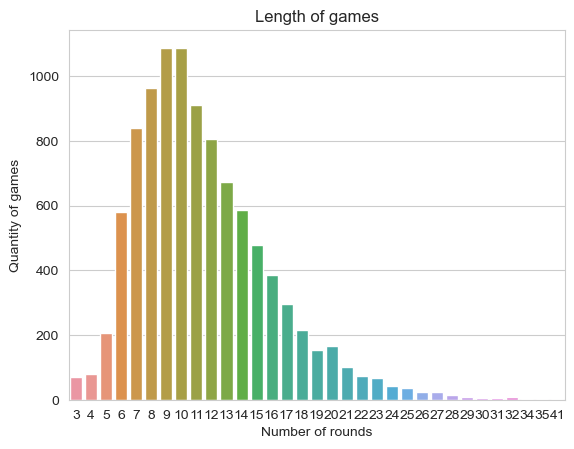

In [37]:
fig = sns.barplot(y = count['games'], x = count['turns'])
fig.set(xlabel ="Number of rounds", ylabel = "Quantity of games", title ='Length of games')
plt.subplots_adjust(hspace = 0.2)

(-1.0, 15.0)

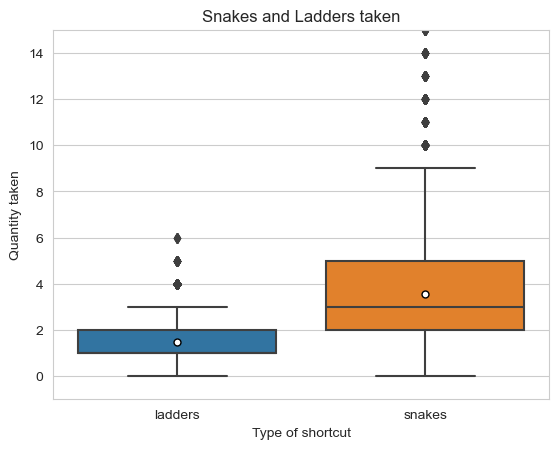

In [38]:
# Game average ladders and snakes
ladders = case2_stats[['round','final_ladders']].rename(columns = {
    'final_ladders':'count'
})
ladders['type'] = 'ladders'

snakes = case2_stats[['round','final_snakes']].rename(columns = {
    'final_snakes':'count'
})
snakes['type'] = 'snakes'

ladders_snakes = pd.concat([ladders,snakes])

fig = sns.boxplot(data=ladders_snakes, x = 'type', y ='count',
                 showmeans=True,
                meanprops={'marker':'o',
                           'markerfacecolor':'white', 
                           'markeredgecolor':'black',
                           'markersize':'5'})
fig.set(xlabel ="Type of shortcut", ylabel = "Quantity taken", title ='Snakes and Ladders taken')

plt.subplots_adjust(hspace = 0.8)
fig.set_ylim(-1, 15)

In [39]:
case2_stats['final_snakes'].describe()

count    10000.000000
mean         3.555300
std          2.780812
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         22.000000
Name: final_snakes, dtype: float64

In [40]:
case2_stats['final_ladders'].describe()

count    10000.0000
mean         1.4680
std          0.9741
min          0.0000
25%          1.0000
50%          1.0000
75%          2.0000
max          6.0000
Name: final_ladders, dtype: float64

## Case 3 

### Game Implementation - Case 3

In [42]:
def play_game(player2_start):
    player1_position = 1
    player2_position = player2_start

    while player1_position < 36 and player2_position < 36:
        # Player 1's turn
        roll = random.randint(1, 6)
        player1_position += roll
        if str(player1_position) in ladder_heads:
            player1_position = int(ladder_heads[str(player1_position)])

        elif str(player1_position) in snake_heads:
            player1_position = int(snake_heads[str(player1_position)])        

        if player1_position < 36:
            # Player 2's turn
            roll = random.randint(1, 6)
            player2_position += roll
            if str(player2_position) in ladder_heads:
                player2_position = int(ladder_heads[str(player2_position)])
                
            elif str(player2_position) in snake_heads:
                player2_position = int(snake_heads[str(player2_position)])

    return player1_position >= 36


### Simulations - Case 3

In [60]:
# Simulate games with different starting positions for Player 2
num_games = 10000
best_start_position = None
min_difference = float('inf')

df_ranges = pd.DataFrame(columns = ['range','diff'])
for start_position in range(2, 20):
    player1_wins = sum(play_game(start_position) for _ in range(num_games))
    player2_wins = num_games - player1_wins
    difference = abs(player1_wins - player2_wins)
    df_ranges = df_ranges.append({
        'range':start_position,
        'diff':difference
    },ignore_index=True)
    if difference < min_difference:
        min_difference = difference
        best_start_position = start_position

print(f"Best starting position for Player 2: {best_start_position}")

Best starting position for Player 2: 7


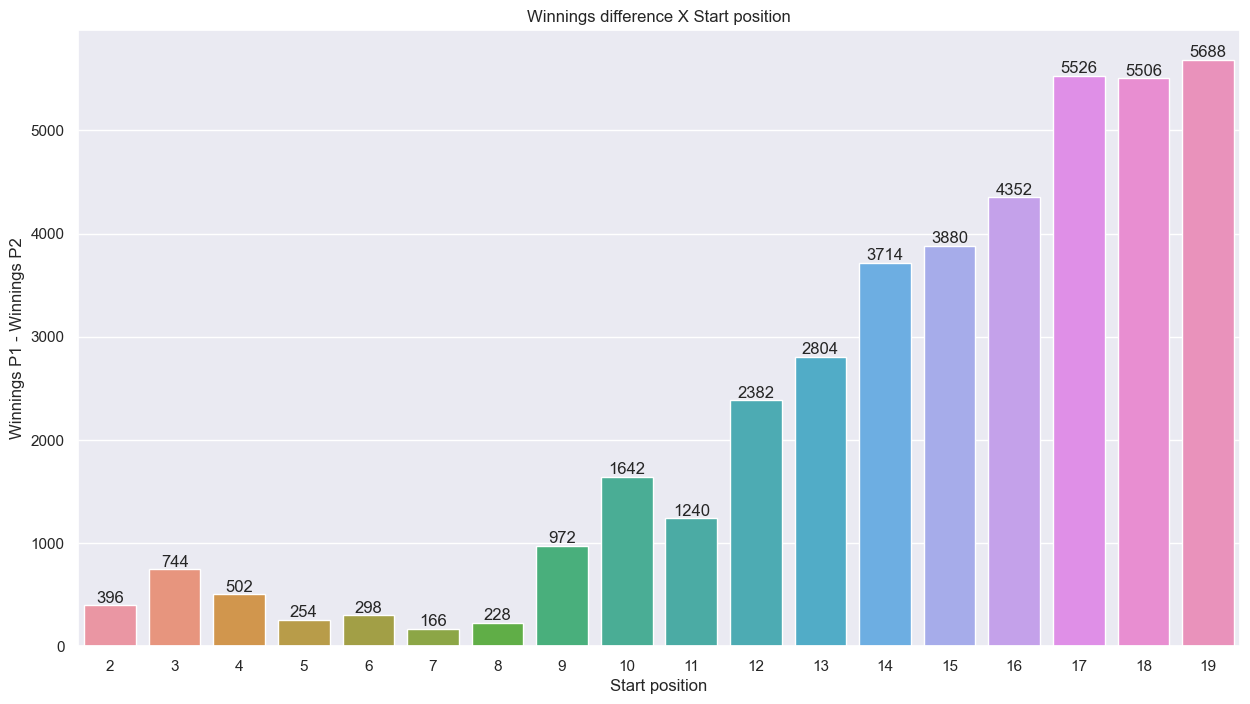

In [62]:
fig = sns.barplot(y = df_ranges['diff'], x = df_ranges['range'])
sns.set(rc={'figure.figsize':(15,8)})
fig.set(xlabel ="Start position", ylabel = "Winnings P1 - Winnings P2", title ='Winnings difference X Start position')
plt.subplots_adjust(hspace = 0.8)
for i in fig.containers:
    fig.bar_label(i,)

## Case 4 

### Game implementation - Case 4

In [63]:
## Insert immunity one time to snakes for player 2
def play_game():
    player_immunity = True
    player1_position = 1
    player2_position = 1
    
    turns = 0
    count_ladders_p1 = 0
    count_ladders_p2 = 0
    count_snakes_p1 = 0
    count_snakes_p2 = 0
    
    while player1_position < 36 and player2_position < 36:
        # Player 1's turn
        roll = random.randint(1, 6)
        player1_position += roll
        if str(player1_position) in ladder_heads:
            count_ladders_p1+=1
            player1_position = int(ladder_heads[str(player1_position)])
            
        elif str(player1_position) in snake_heads:
            count_snakes_p1+=1
            player1_position = int(snake_heads[str(player1_position)])        

        if player1_position < 36:
            # Player 2's turn
            roll = random.randint(1, 6)
            player2_position += roll
            if str(player2_position) in ladder_heads:
                count_ladders_p2+=1
                player2_position = int(ladder_heads[str(player2_position)])
            elif str(player2_position) in snake_heads:
                if player_immunity:
                    count_snakes_p2+=1
                    player2_position = int(snake_heads[str(player2_position)])
                    player_immunity = False
        
        turns+=1
        
    info_dict = {
        'turns':turns,
        'ladders_p1': count_ladders_p1,
        'ladders_p2': count_ladders_p2,
        'snakes_p1': count_snakes_p1,
        'snakes_p2': count_snakes_p2,
        'final_p1': player1_position,
        'final_p2': player2_position
    }
    return info_dict

### Simulations - Case 4

In [64]:
case4 = []
for _ in range(num_games):
    case4.append(play_game())
    
case4_stats = pd.DataFrame(case4)
case4_stats['round'] = np.arange(1,10001)
case4_stats['win_p1'] = case4_stats['final_p1'] >= 36

case4_stats['final_ladders'] = case4_stats['ladders_p1'] + case4_stats['ladders_p2']
case4_stats['final_snakes'] = case4_stats['snakes_p1'] + case4_stats['snakes_p2']

case4_stats = case4_stats[['round','turns', 'ladders_p1', 'ladders_p2', 'snakes_p1', 
                           'snakes_p2','final_ladders','final_snakes','final_p1', 'final_p2','win_p1']]

In [65]:
probability_player1_wins = sum(case4_stats['win_p1']) / num_games
print(f"Probability that player 1 wins: {probability_player1_wins:.2%}")
print(f"Probability that player 2 wins: {1 - probability_player1_wins:.2%}")

Probability that player 1 wins: 38.86%
Probability that player 2 wins: 61.14%


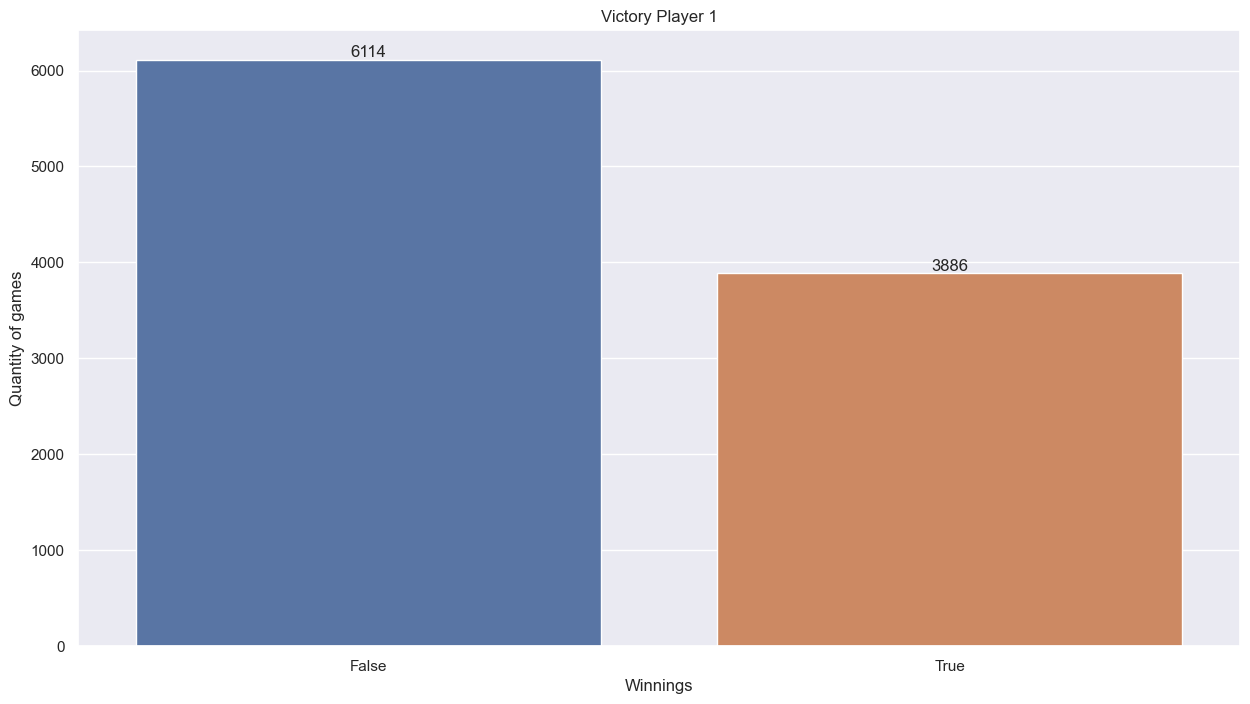

In [75]:
victory_p1 = case4_stats.groupby(['win_p1'],as_index = False)['round'].count()
fig = sns.barplot(y = victory_p1['round'], x = victory_p1['win_p1'])
fig.set(xlabel ="Winnings", ylabel = "Quantity of games", title ='Victory Player 1')
plt.subplots_adjust(hspace = 0.8)

for i in fig.containers:
    fig.bar_label(i,)

In [66]:
# Average Rounds
count = case4_stats.groupby(['turns'],as_index=False)['round'].count().rename(columns = {
    'round':'games'
})
case4_stats['turns'].describe()

count    10000.000000
mean         8.719800
std          2.666758
min          3.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         19.000000
Name: turns, dtype: float64

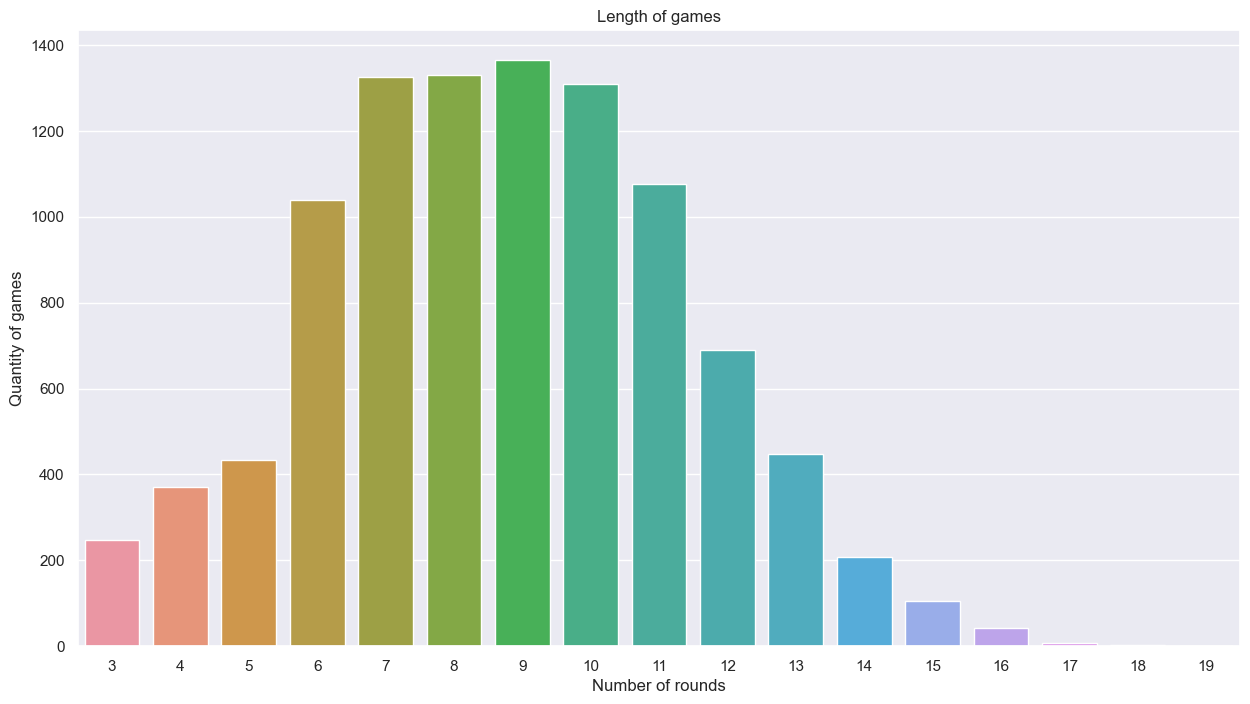

In [67]:
fig = sns.barplot(y = count['games'], x = count['turns'])
fig.set(xlabel ="Number of rounds", ylabel = "Quantity of games", title ='Length of games')
plt.subplots_adjust(hspace = 0.2)

In [68]:
case4_stats['ladders_p1'].describe()

count    10000.00000
mean         1.20820
std          0.80232
min          0.00000
25%          1.00000
50%          1.00000
75%          2.00000
max          5.00000
Name: ladders_p1, dtype: float64

In [69]:
case4_stats['ladders_p2'].describe()

count    10000.000000
mean         1.143500
std          0.775479
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: ladders_p2, dtype: float64

In [70]:
case4_stats['snakes_p1'].describe()

count    10000.000000
mean         1.424600
std          1.275177
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          9.000000
Name: snakes_p1, dtype: float64

In [71]:
case4_stats['snakes_p2'].describe()

count    10000.000000
mean         0.705400
std          0.455886
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: snakes_p2, dtype: float64